In [90]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score, precision_score

## Logistic Regression

## SOAL :
<img src='soal.png'>

In [1]:
import pandas as pd
import numpy as np

<img src='22.png'>

In [2]:
bank = pd.read_csv('bankloan.csv')
bank.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [64]:
fitur = ['employ','debtinc','creddebt','othdebt']
target = ['default']

In [65]:
X = bank[fitur]
Y = bank[target]

In [66]:
X.describe()

,employ,debtinc,creddebt,othdebt
count,700.000000,700.000000,700.000000,700.000000
mean,8.388571,10.260571,1.553553,3.058209
std,6.658039,6.827234,2.117197,3.287555
min,0.000000,0.400000,0.011696,0.045584
25%,3.000000,5.000000,0.369059,1.044178
50%,7.000000,8.600000,0.854869,1.987567
75%,12.000000,14.125000,1.901955,3.923065
max,31.000000,41.300000,20.561310,27.033600


## Modelling

In [67]:
import statsmodels.api as sm

In [68]:
sm_logit = sm.Logit(Y,sm.add_constant(X))
result = sm_logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.411165
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                  700
Model:                          Logit   Df Residuals:                      695
Method:                           MLE   Df Model:                            4
Date:                Wed, 13 Jan 2021   Pseudo R-squ.:                  0.2844
Time:                        22:01:26   Log-Likelihood:                -287.82
converged:                       True   LL-Null:                       -402.18
Covariance Type:            nonrobust   LLR p-value:                 2.473e-48
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2302      0.236     -5.210      0.000      -1.693      -0.767
employ        -0.2436      0.

## Colinearity

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [70]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [71]:
calc_vif(X)

,variables,VIF
0,employ,2.222753
1,debtinc,3.045977
2,creddebt,2.816577
3,othdebt,4.116876


### Efek Employ Terhadap Default (B1 : Y)

### B1 = -0.2436 : When employment increase __one year__ and no changes in another variable, the risk to become default most likely decrease 1.27 times

In [72]:
(np.exp(-0.2436*(1-0)))

0.7838010920039364

### Ini sama aja. Maksudnya B1(Tahun 1) : 0.78 B1(Tahun 0)

In [73]:
-(np.exp(0.2436*(1-0)))

-1.2758338948511923

### Efek Debtinc Terhadap Default (B2 : Y)

### B2 = 0.0885 : When ratio debt to income increase __one__ and no changes in another variable, the risk to become default most likely increase 1.09 times

In [74]:
(np.exp(0.0885*(1-0)))

1.0925342526104793

### Efek Creddebt Terhadap Default (B3 : Y)
### B3 = 0.5041 :  When creddebt increase __5$__ and no changes in another variable, the risk to become default most likely increase 12.43 times

In [75]:
np.exp(0.5041*(5-0))

12.434812515742879

In [76]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                  700
Model:                          Logit   Df Residuals:                      695
Method:                           MLE   Df Model:                            4
Date:                Wed, 13 Jan 2021   Pseudo R-squ.:                  0.2844
Time:                        22:01:27   Log-Likelihood:                -287.82
converged:                       True   LL-Null:                       -402.18
Covariance Type:            nonrobust   LLR p-value:                 2.473e-48
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2302      0.236     -5.210      0.000      -1.693      -0.767
employ        -0.2436      0.029     -8.456      0.000      -0.300      -0.187
debtinc        0.0885      0.021      4.200      0.0

LLR-Test:
<br>
B1, B2, B3, B4 : P-Value of the Log-Likelihood Ratio is below 0.05. We have enough evidence that minimal either employ, debtinc, creddebt, othdebt have significant effect to credit default rate.
<br>
Wald Test:
1. B0 : P-Value of the partial test is below 0.05. We need B0 in the model
1. B1 : P-Value of the partial test is below 0.05. With significant level of 5%, we have enough evidence that employ decrease default rate
1. B2 : P-Value of the partial test is below 0.05. With significant level of 5%, we have enough evidence that debtinc increase default rate.
1. B3 : P-Value of the partial test is below 0.05. With significant level of 5%, we have enough evidence that creddebt increase default rate.
1. B3 : P-Value of the partial test is greater than 0.05. With significant level of 5%, we dont have enough evidence that othdebt has significant effect to default rate

Parameter Estimate:
1. B1 = -0.2436 : Employment decrease default rate. When employment increase one year and no changes in another variable, the risk to become default most likely decrease 1.27 times 
1. B2 = 0.0885 : Ratio debt to income increase default rate. When ratio debt to income increase one and no changes in another variable, the risk to become default most likely increase 1.09 times
1. B3 = 0.5041 :  creddebt increase default rate. When creddebt increase 5$ and no changes in another variable, the risk to become default most likely increase 12.43 times
1. It is strongly recommended to interprete within the interval of predictor.

Coefficient Determination:
<br>
Pseudo R-Square = 28.44% : This model can explain 28.33% variation of default rate.

<img src = 'traintest.png'>

## Untuk Dibaca :

https://math.hws.edu/javamath/ryan/ChiSquare.html#:~:text=Notice%20that%20discrete%20data%20arise,(or%20more)%20independent%20groups.

https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

https://www.statisticssolutions.com/directory-of-statistical-analyses-correlation-ratio/


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,stratify=Y,test_size = 0.2, random_state = 2021)

In [79]:
Y['default'].value_counts(normalize=True)

0    0.738571
1    0.261429
Name: default, dtype: float64

In [80]:
Y_train['default'].value_counts(normalize=True)

0    0.739286
1    0.260714
Name: default, dtype: float64

In [81]:
Y_test['default'].value_counts(normalize=True)

0    0.735714
1    0.264286
Name: default, dtype: float64

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
logit = LogisticRegression()
logit.fit(X_train,Y_train)

C:\Users\johan\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [91]:
Y_pred = logit.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       103
           1       0.90      0.51      0.66        37

    accuracy                           0.86       140
   macro avg       0.88      0.75      0.78       140
weighted avg       0.86      0.86      0.84       140



In [24]:
Y_proba = logit.predict_proba(X_test)
Y_proba[:5]

array([[0.90175195, 0.09824805],
       [0.98899285, 0.01100715],
       [0.80813672, 0.19186328],
       [0.7552628 , 0.2447372 ],
       [0.80381819, 0.19618181]])

In [25]:
pred_proba = pd.DataFrame({'prediksi':Y_pred,
                          'prob nilainya 0':Y_proba[:,0],
                          'prob nilainya 1':Y_proba[:,1]})
pred_proba

,prediksi,prob nilainya 0,prob nilainya 1
0,0,0.901752,0.098248
1,0,0.988993,0.011007
2,0,0.808137,0.191863
3,0,0.755263,0.244737
4,0,0.803818,0.196182
...,...,...,...
135,0,0.819952,0.180048
136,0,0.799670,0.200330
137,0,0.922540,0.077460
138,0,0.972303,0.027697


In [26]:
copy = bank[fitur].copy()
copy['default']=bank[target].copy()
copy.head()

,employ,debtinc,creddebt,othdebt,default
0,17,9.3,11.359392,5.008608,1
1,10,17.3,1.362202,4.000798,0
2,15,5.5,0.856075,2.168925,0
3,15,2.9,2.658720,0.821280,0
4,2,17.3,1.787436,3.056564,1


In [27]:
X.columns

Index(['employ', 'debtinc', 'creddebt', 'othdebt'], dtype='object')

In [28]:
logit.coef_

array([[-0.21485105,  0.09407482,  0.4674277 , -0.04253434]])

## Pembuktian Sigmoid Function

In [29]:
employ, debtinc, creddebt, othdebt = logit.coef_[0]
print('Koef Employ :',employ)
print('Koef debtinc :',debtinc)
print('Koef creddebt :',creddebt)
print('Koef othdebt :',othdebt)

Koef Employ : -0.21485105429856197
Koef debtinc : 0.09407481636614193
Koef creddebt : 0.46742769715103955
Koef othdebt : -0.04253433886567238


In [30]:
b0 = logit.intercept_[0]
b0

-1.29938727807727

In [31]:
a=np.exp(b0 + (employ*X_test['employ'])+(debtinc*X_test['debtinc'])+(creddebt*X_test['creddebt'])+ (othdebt*X_test['othdebt']))
a.reset_index(drop=True,inplace=True)
a

0      0.108952
1      0.011130
2      0.237414
3      0.324042
4      0.244062
         ...   
135    0.219583
136    0.250517
137    0.083964
138    0.028486
139    0.122785
Length: 140, dtype: float64

In [35]:
b=np.exp(-(b0 + (employ*X_test['employ'])+(debtinc*X_test['debtinc'])+(creddebt*X_test['creddebt'])+ (othdebt*X_test['othdebt'])))
b.reset_index(drop=True,inplace=True)
b

0       9.178319
1      89.850021
2       4.212045
3       3.086016
4       4.097312
         ...    
135     4.554081
136     3.991753
137    11.909830
138    35.104569
139     8.144298
Length: 140, dtype: float64

In [34]:
proba1 = a/(1+a)
proba1

0      0.098248
1      0.011007
2      0.191863
3      0.244737
4      0.196182
         ...   
135    0.180048
136    0.200330
137    0.077460
138    0.027697
139    0.109358
Length: 140, dtype: float64

In [33]:
pred_proba['P(Y=1)']=proba1
pred_proba['P(Y=0)']=1-pred_proba['P(Y=1)']
pred_proba

,prediksi,prob nilainya 0,prob nilainya 1,P(Y=1),P(Y=0)
0,0,0.901752,0.098248,0.098248,0.901752
1,0,0.988993,0.011007,0.011007,0.988993
2,0,0.808137,0.191863,0.191863,0.808137
3,0,0.755263,0.244737,0.244737,0.755263
4,0,0.803818,0.196182,0.196182,0.803818
...,...,...,...,...,...
135,0,0.819952,0.180048,0.180048,0.819952
136,0,0.799670,0.200330,0.200330,0.799670
137,0,0.922540,0.077460,0.077460,0.922540
138,0,0.972303,0.027697,0.027697,0.972303


<img src='carake2.png'>

In [36]:
proba2 = 1/(1+b)
proba2

0      0.098248
1      0.011007
2      0.191863
3      0.244737
4      0.196182
         ...   
135    0.180048
136    0.200330
137    0.077460
138    0.027697
139    0.109358
Length: 140, dtype: float64

In [37]:
pred_proba['2P(Y=1)']=proba2
pred_proba['2P(Y=0)']=1-pred_proba['2P(Y=1)']
pred_proba

,prediksi,prob nilainya 0,prob nilainya 1,P(Y=1),P(Y=0),2P(Y=1),2P(Y=0)
0,0,0.901752,0.098248,0.098248,0.901752,0.098248,0.901752
1,0,0.988993,0.011007,0.011007,0.988993,0.011007,0.988993
2,0,0.808137,0.191863,0.191863,0.808137,0.191863,0.808137
3,0,0.755263,0.244737,0.244737,0.755263,0.244737,0.755263
4,0,0.803818,0.196182,0.196182,0.803818,0.196182,0.803818
...,...,...,...,...,...,...,...
135,0,0.819952,0.180048,0.180048,0.819952,0.180048,0.819952
136,0,0.799670,0.200330,0.200330,0.799670,0.200330,0.799670
137,0,0.922540,0.077460,0.077460,0.922540,0.077460,0.922540
138,0,0.972303,0.027697,0.027697,0.972303,0.027697,0.972303


# Terbukti sama aja cuy

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

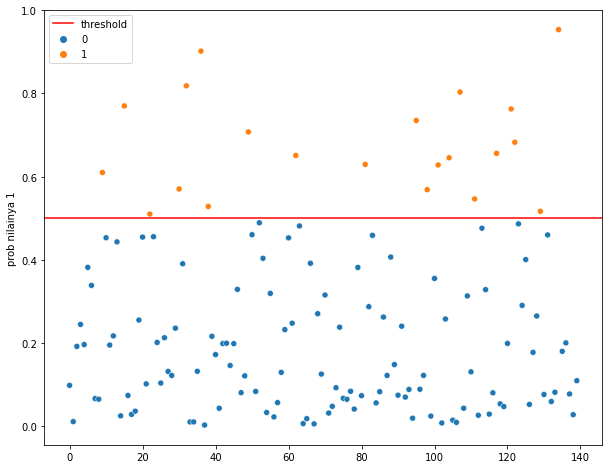

In [51]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=np.arange(len(pred_proba)),y=pred_proba['prob nilainya 1'],hue = pred_proba['prediksi'])
plt.axhline(0.5,color='red',label = 'threshold')
plt.legend()
plt.show()


In [52]:
from sklearn import datasets
breast = datasets.load_breast_cancer()
dir(breast)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [53]:
print(breast['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [54]:
df = pd.DataFrame(data=breast['data'], columns=breast['feature_names'])
df['target'] = breast['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [55]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [56]:
first_10 = df.iloc[:,:11]
first_10['target'] = df['target'].copy()
first_10

<ipython-input-56-7fa5bae28bf2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_10['target'] = df['target'].copy()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0
...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,0


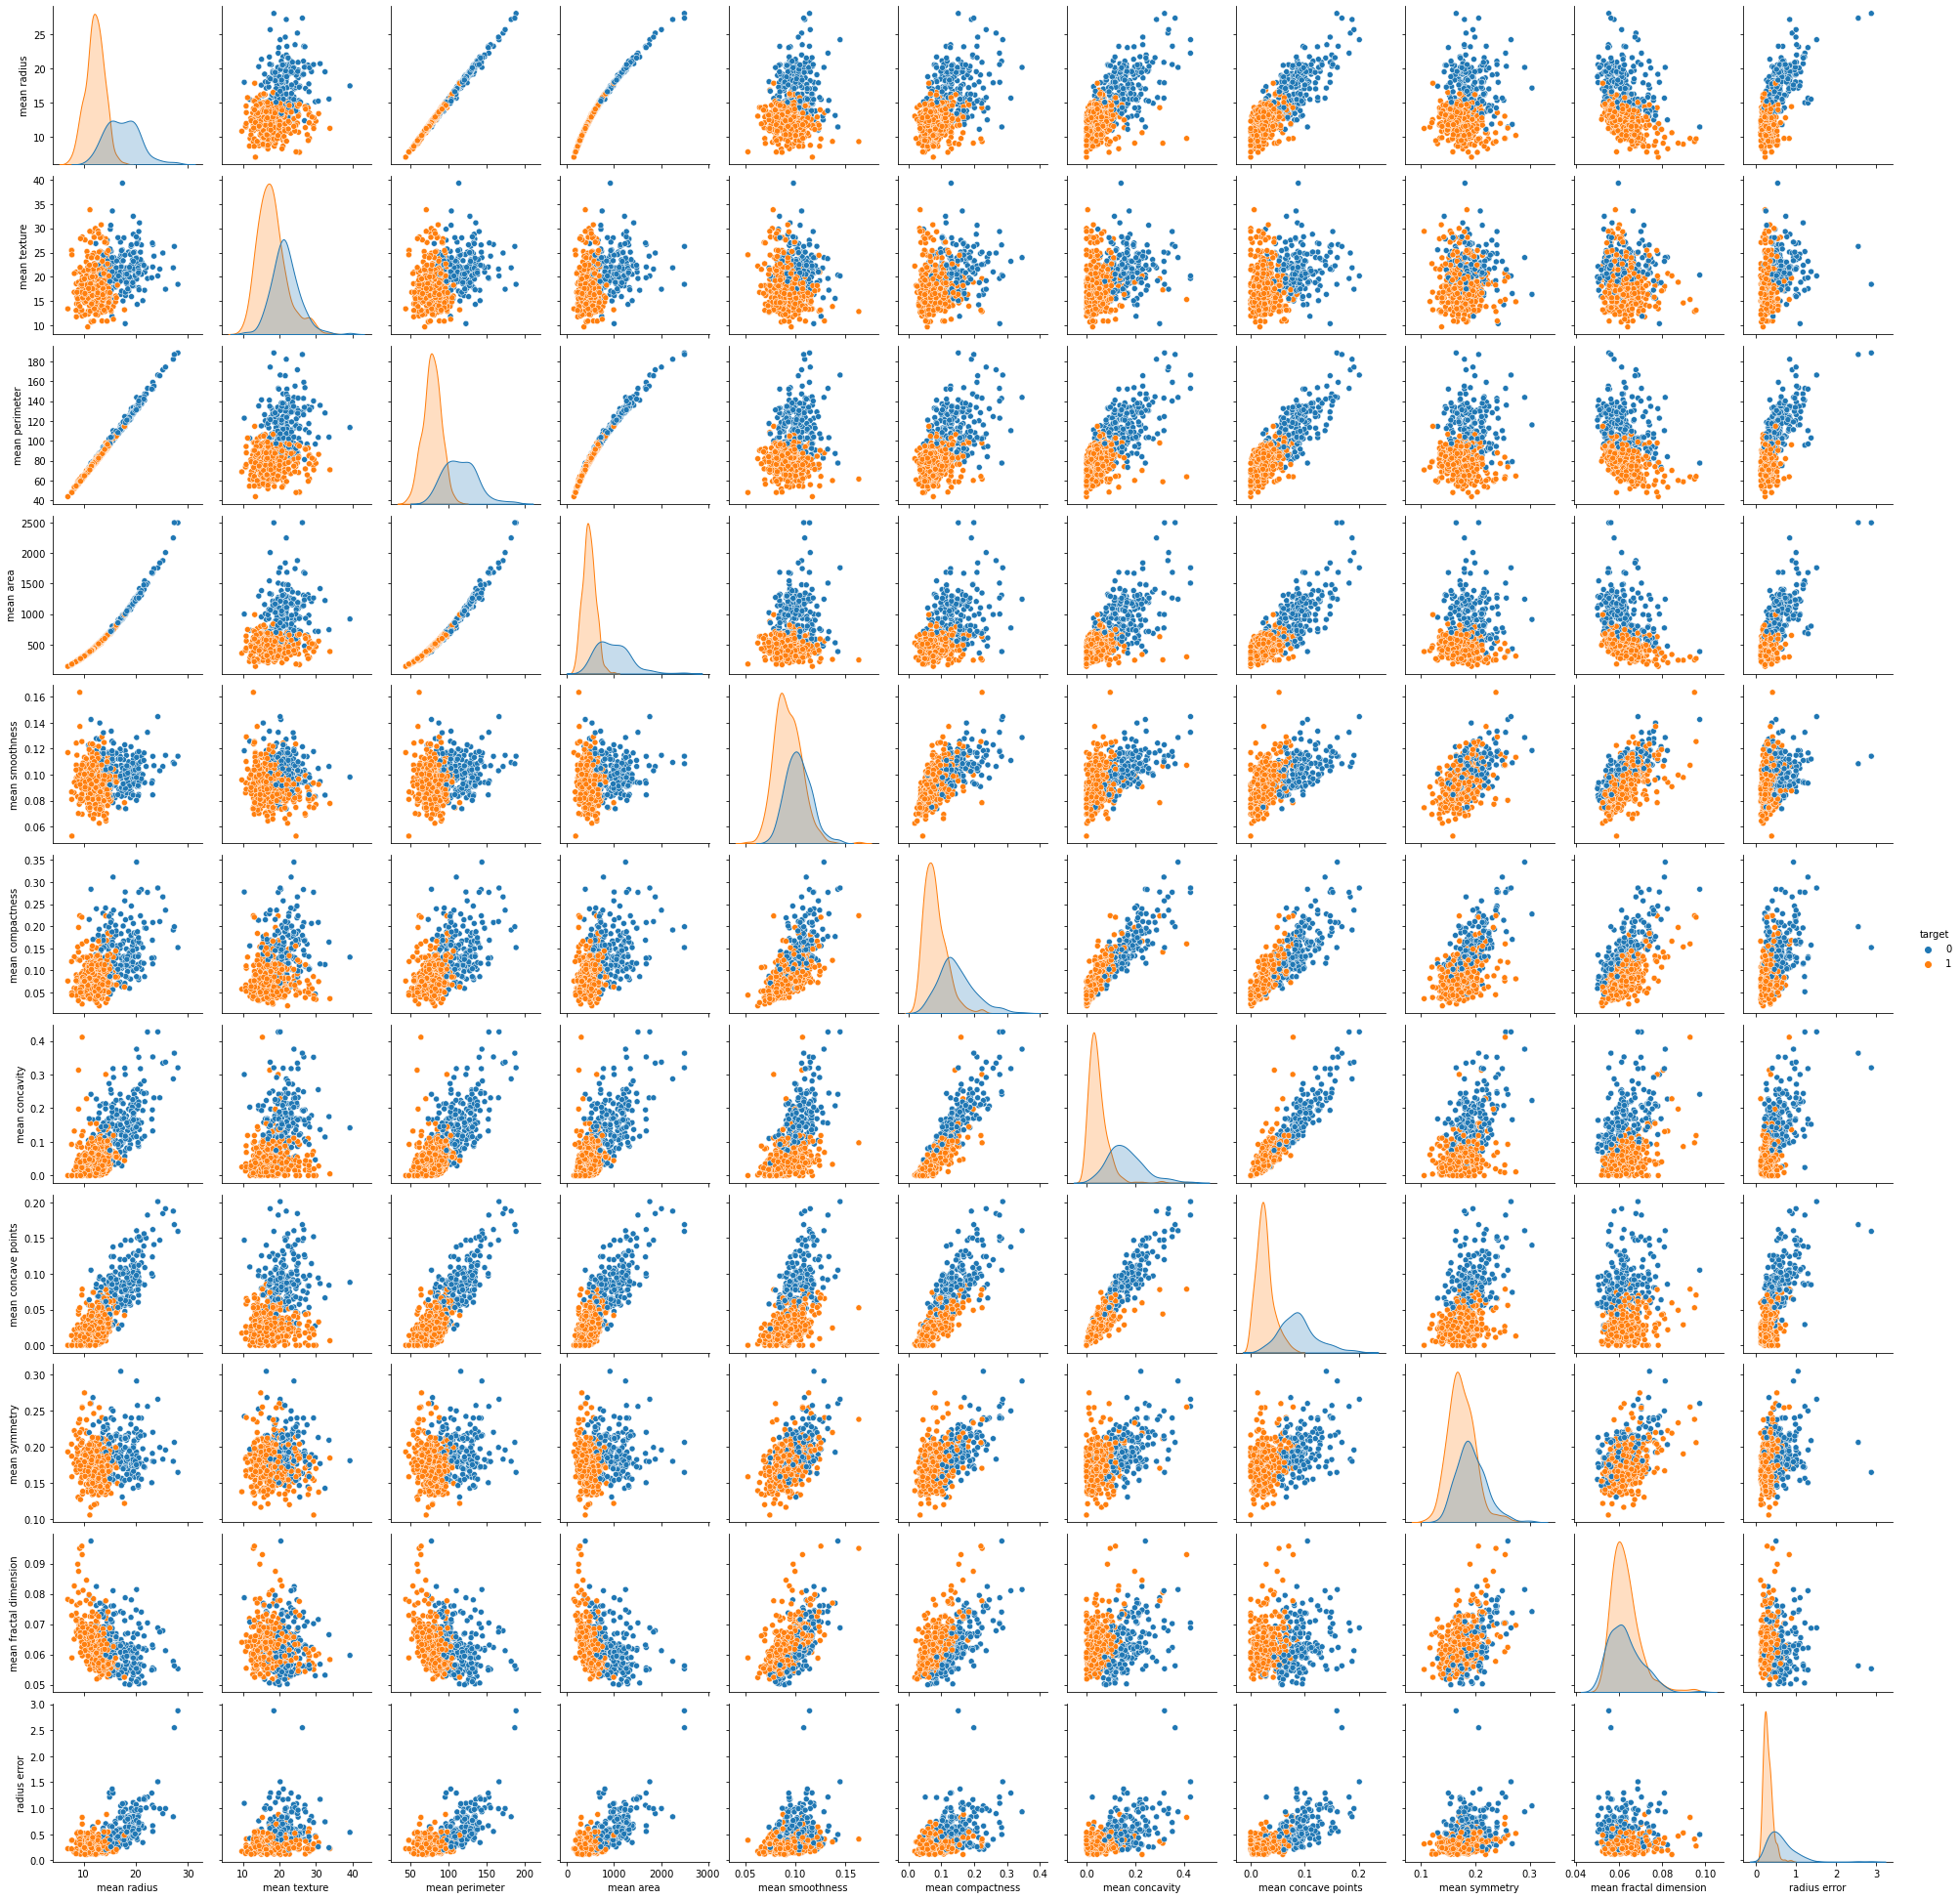

In [57]:
sns.pairplot(data=first_10, hue='target')

In [58]:
df['target'].value_counts(normalize=True)

1    0.627417
0    0.372583
Name: target, dtype: float64

In [89]:
xi = first_10[['mean perimeter', 'mean concave points']]
yi = first_10['target']

xi_train, xi_test, yi_train, yi_test = train_test_split(xi, yi, stratify=yi, test_size=0.2,random_state=2021)


In [90]:
blr = LogisticRegression()
blr.fit(xi_train,yi_train)

LogisticRegression()

In [91]:
yi_pred = blr.predict(xi_test)
accuracy_score(yi_test,yi_pred)

0.8947368421052632

# Confusion Matrix

<img src='Confusion Matrix.png'>

In [92]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

In [93]:
confusion_matrix(yi_test,yi_pred)

array([[35,  7],
       [ 5, 67]], dtype=int64)

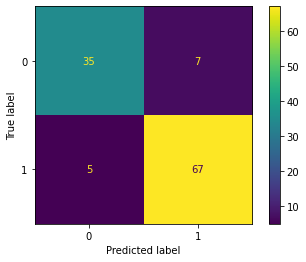

In [94]:
plot_confusion_matrix(blr,xi_test,yi_test)
plt.show()

In [87]:
(35+67)/(35+67+7+5)

0.8947368421052632

In [ ]:
#KNN, Scaling, Decision Tree, Confusion Matrix